In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import zipfile
from matplotlib.ticker import ScalarFormatter
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D

In [12]:
wishart = zipfile.ZipFile('wishart.zip')
def analyze_data(m, d, r, num_seeds=10):
    fig, axes = plt.subplots(figsize=[10, 6], ncols=1, nrows=1, constrained_layout=True)
    for seed in range(num_seeds):
        with wishart.open(f'wishart_({m}, {d}, {r}, {seed}).json') as f:
            df = json.loads(f.read())

        initial_error = df['tsd_objective'][0] 

        sns.lineplot(y=df['tsd_objective'], 
                        x=100*(np.array(df['tsd_time']).cumsum()/df['max_time']), ax=axes, linestyle='-.', color='b')
        sns.lineplot(y=df['tsd_objective_rand'], x=100*(np.array(df['tsd_time_rand']).cumsum()/df['max_time']),
                    ax=axes, linestyle=':', color='g')
        sns.lineplot(y=df['rgd_objective'], x=100*(np.array(df['rgd_time']).cumsum()/df['max_time']), 
                     ax=axes, color='r')

    axes.set(yscale="log")
    axes.legend(title='Algorithms')
    axes.set_xlabel('% time elapsed (seconds)')
    axes.set_ylabel('Sub optimiality')
    axes.set_title(f'(m, d, r)=({m}, {d}, {r})')
    # Set the tick formatter for x-axis and y-axis
    axes.xaxis.set_major_formatter(ScalarFormatter());
    custom_lines = [Line2D([0], [0], color='blue', linestyle='-.', lw=2),
                    Line2D([0], [0], color='green', linestyle=':', lw=2),
                    Line2D([0], [0], color='red', lw=2),
                   ]

    # Add the custom legend to the figure with the specified label
    axes.legend(custom_lines, ['TSD', 'TSD Randomized', 'RGD'])

    # Optional: You can also disable the offset in the formatter
    axes.xaxis.get_major_formatter().set_useOffset(False);
    
    return fig

In [13]:
ms = [1000, 10000]
ds = [50, 100, 500, 1000]
rs = [10, 50]

test_data = [(m,d,r) for m in ms for d in ds for r in rs]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


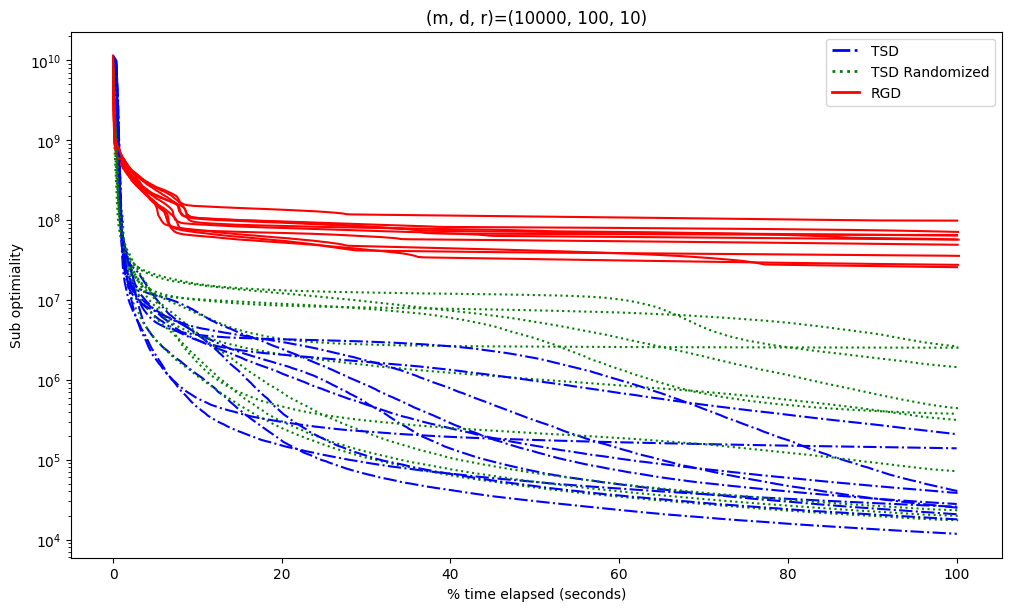

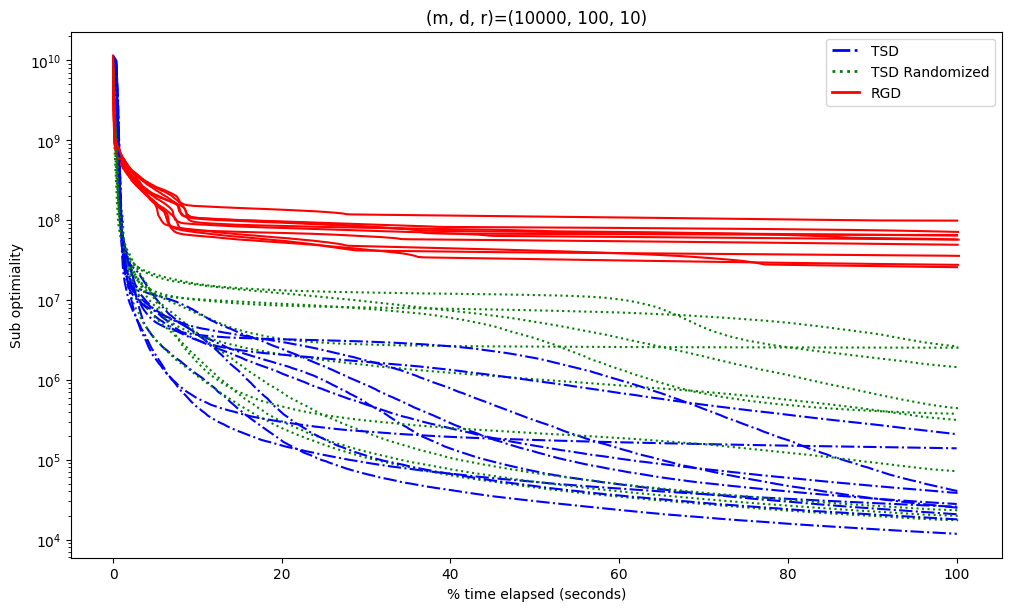

In [14]:
analyze_data(10000, 100, 10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

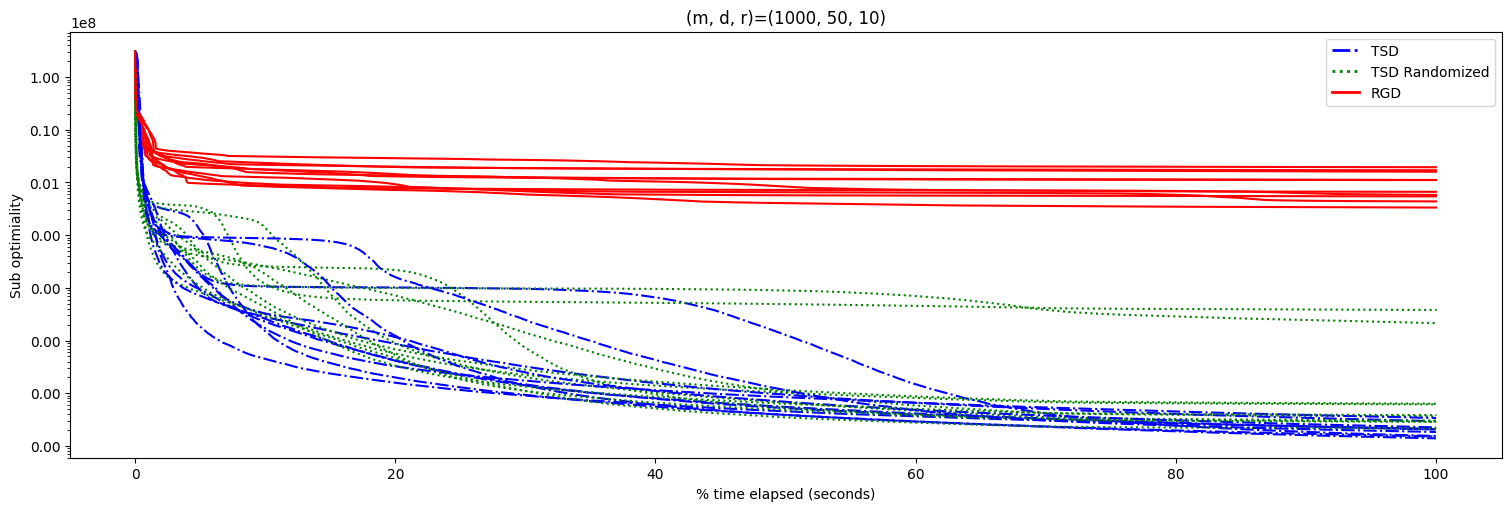

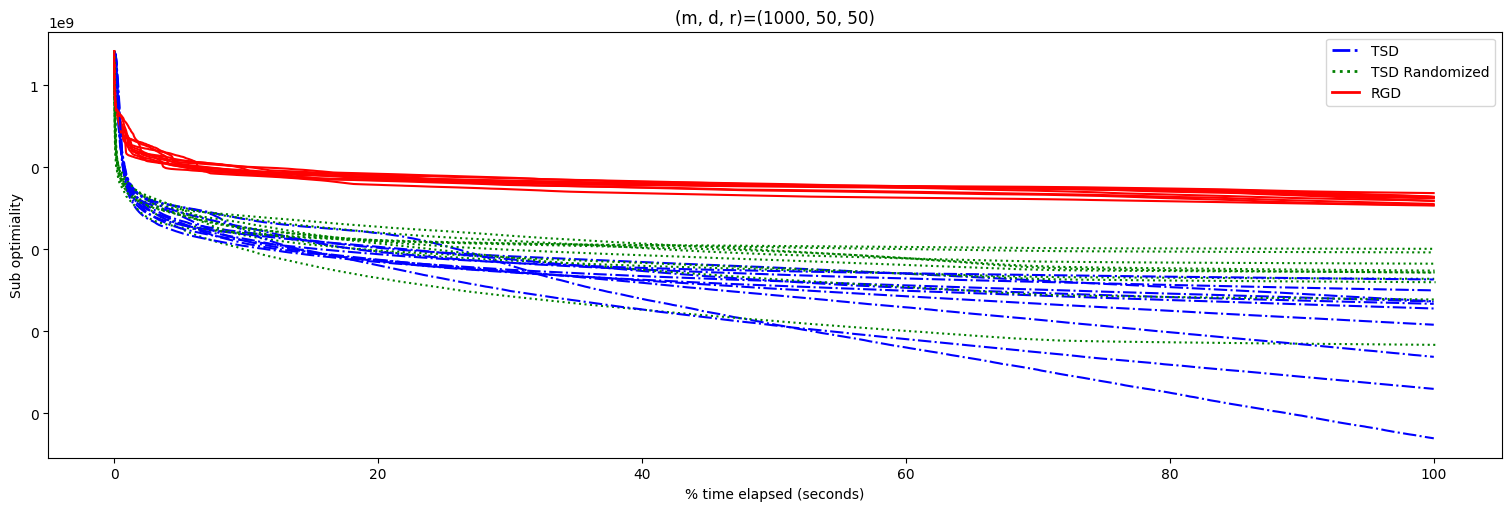

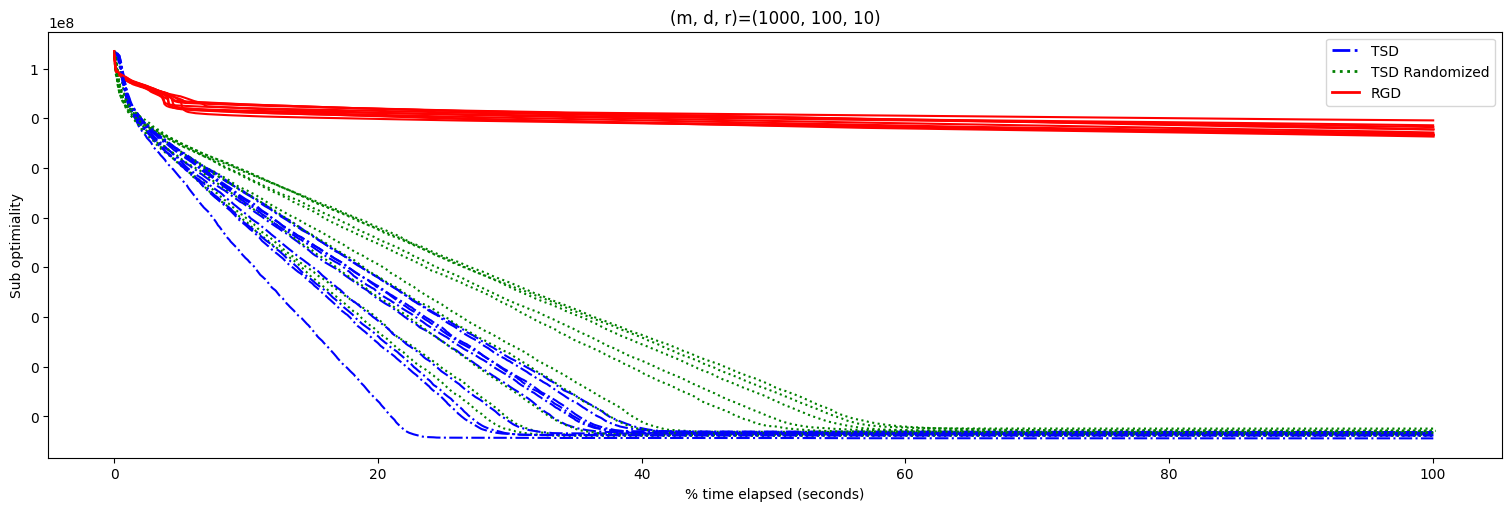

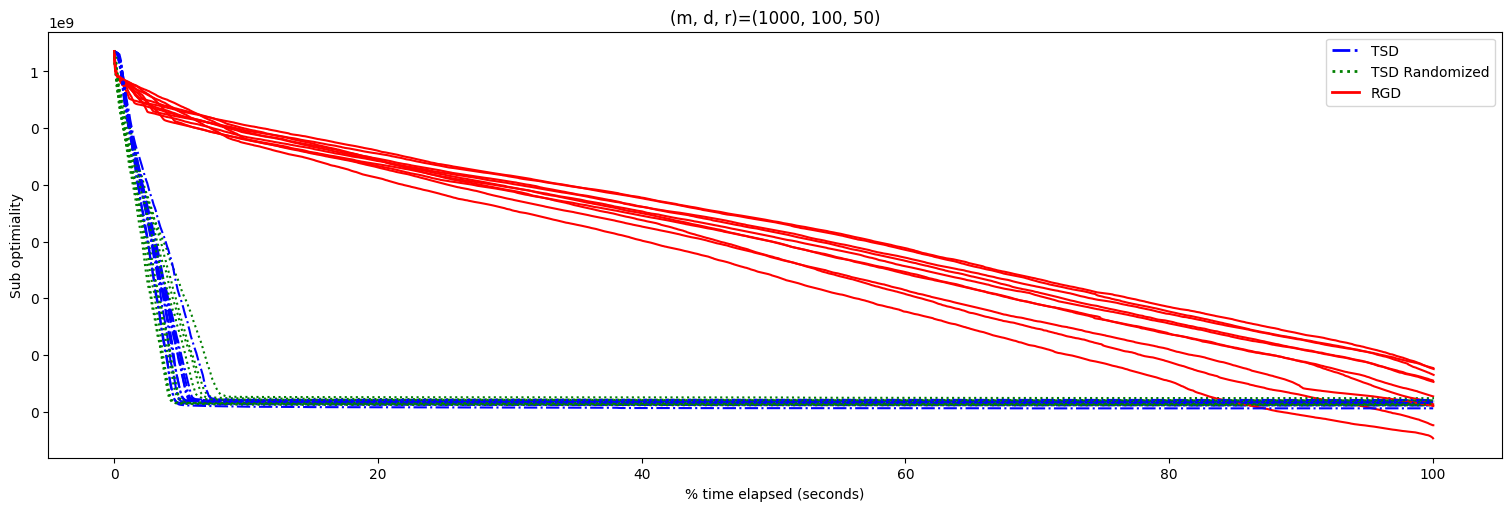

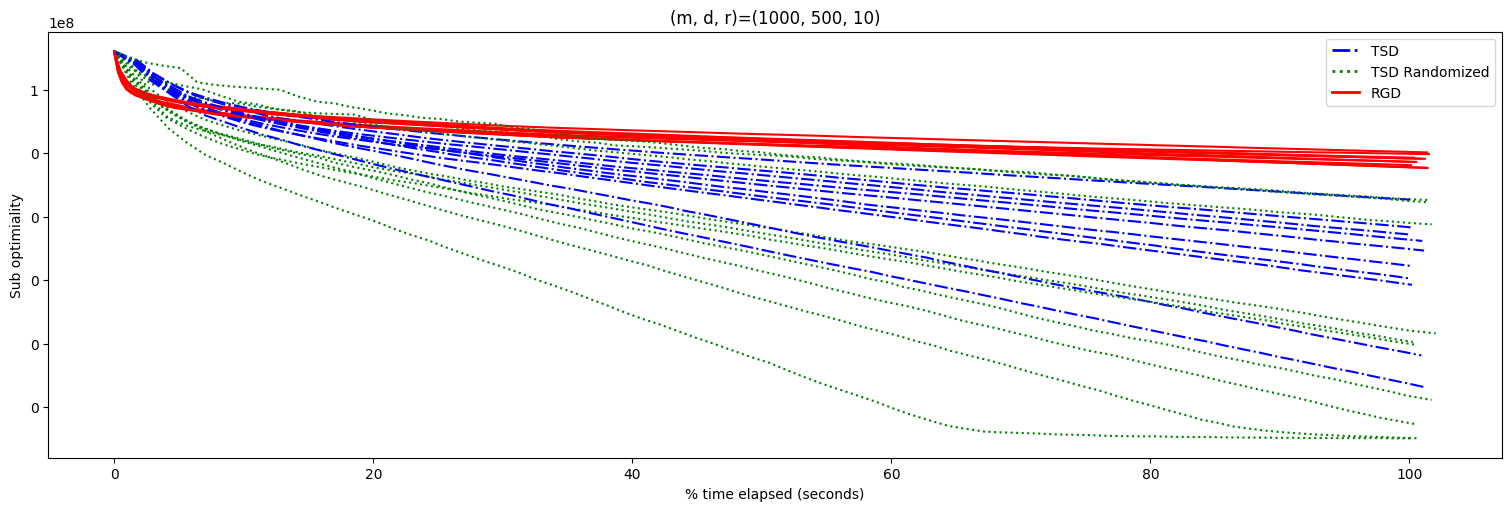

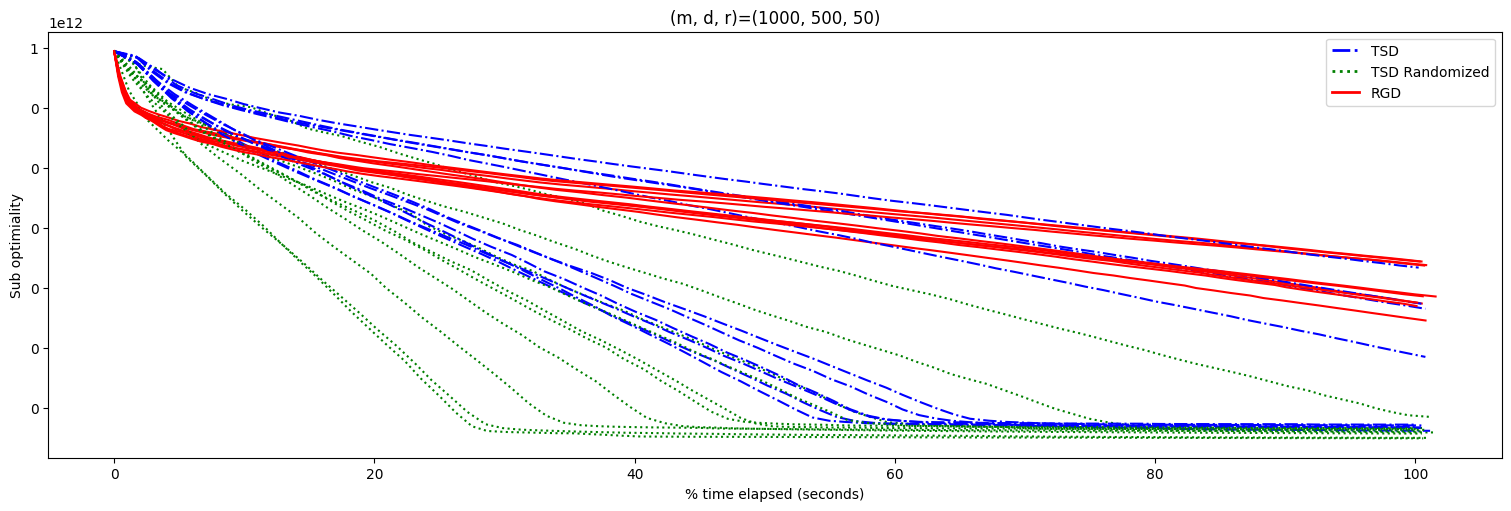

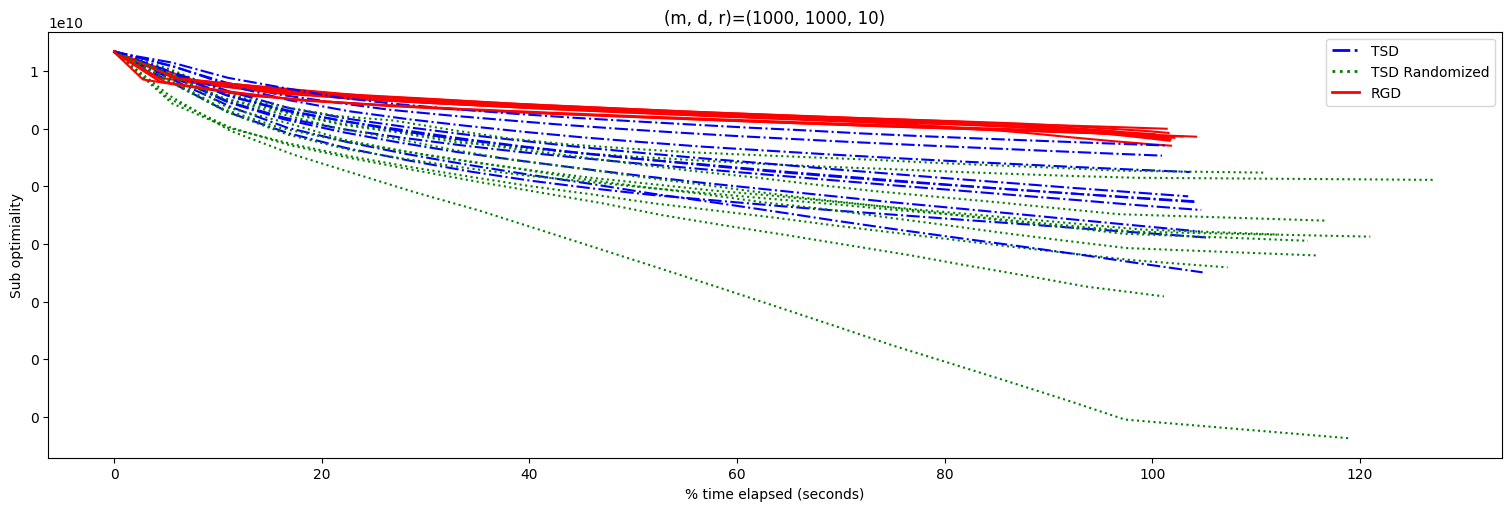

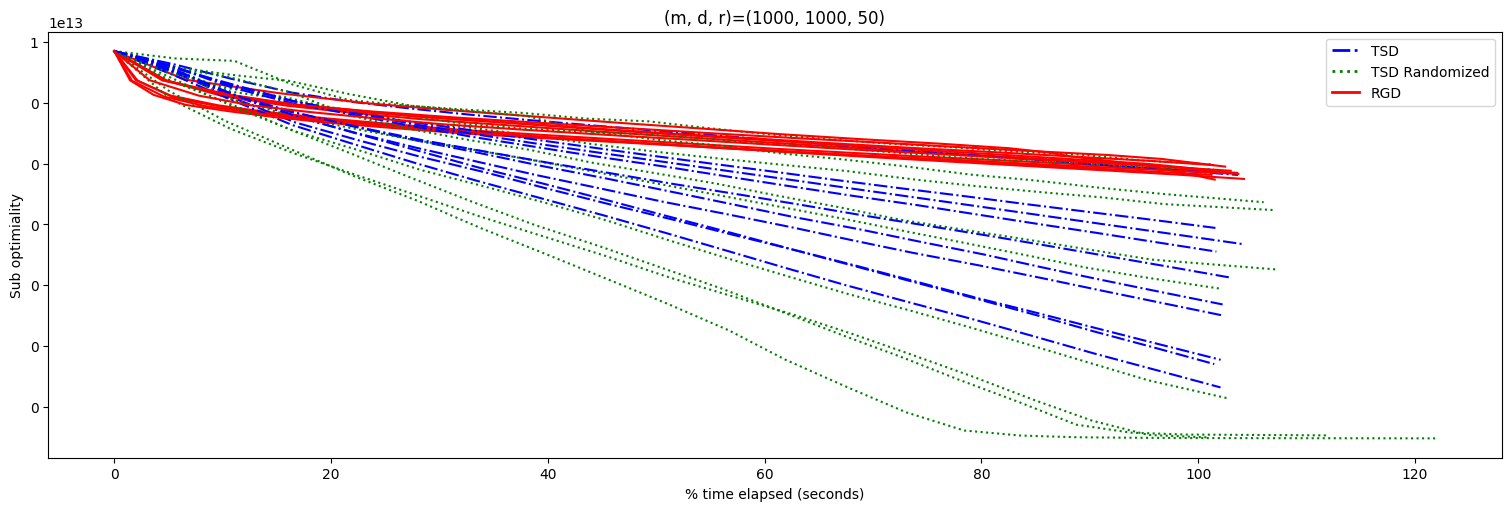

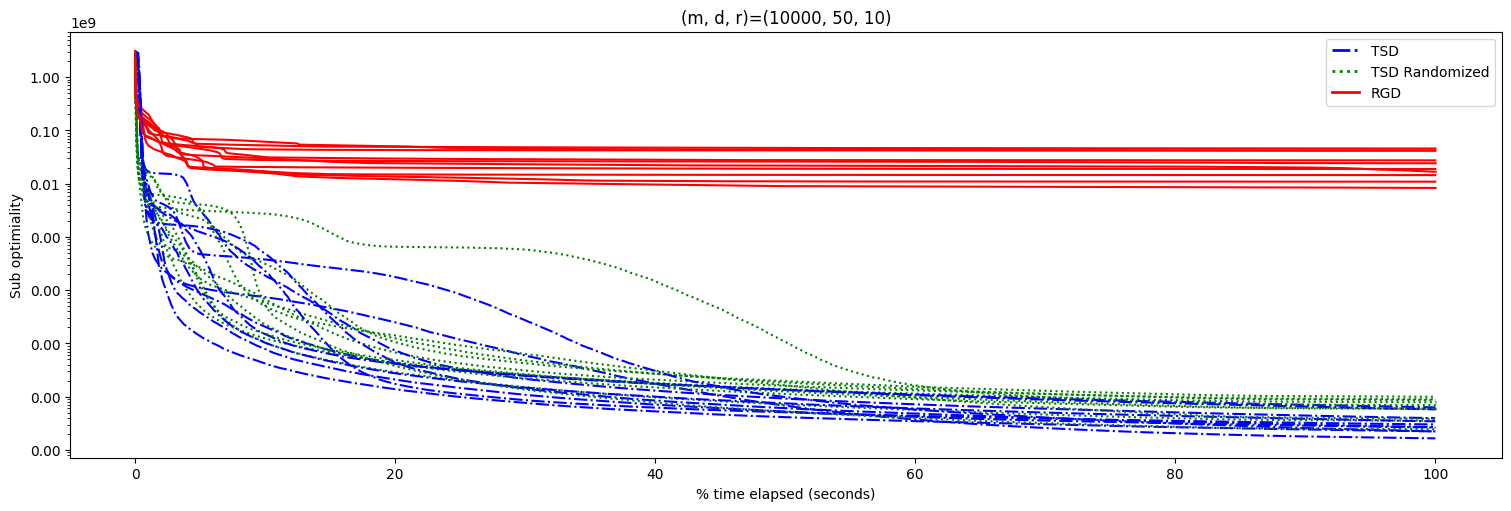

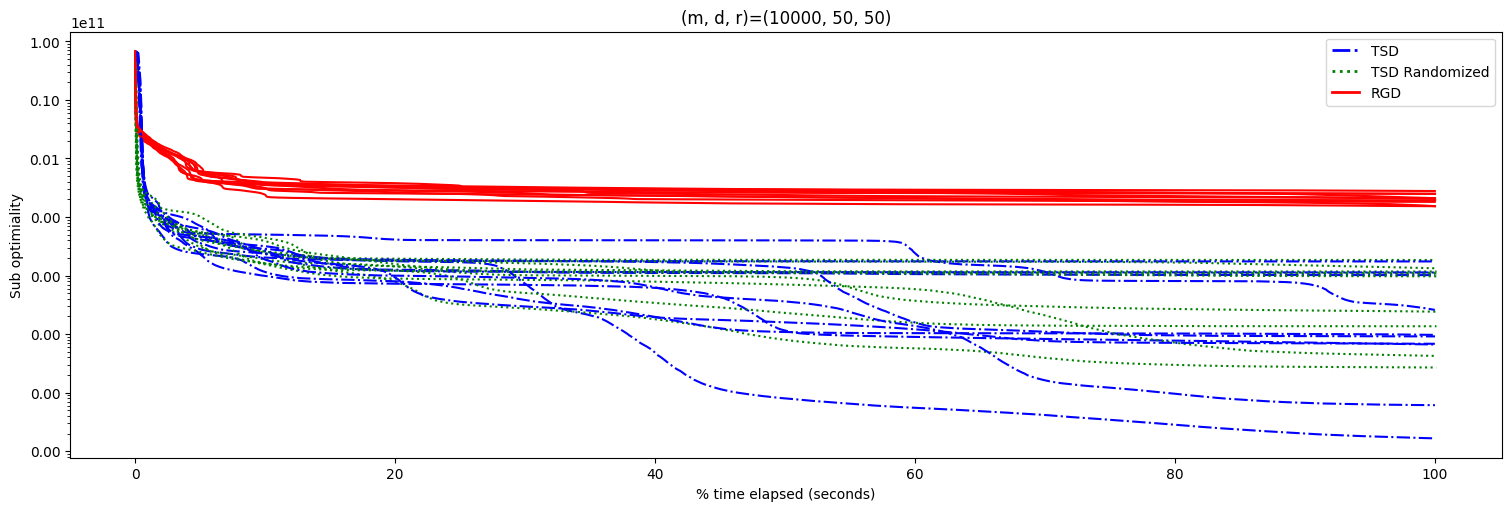

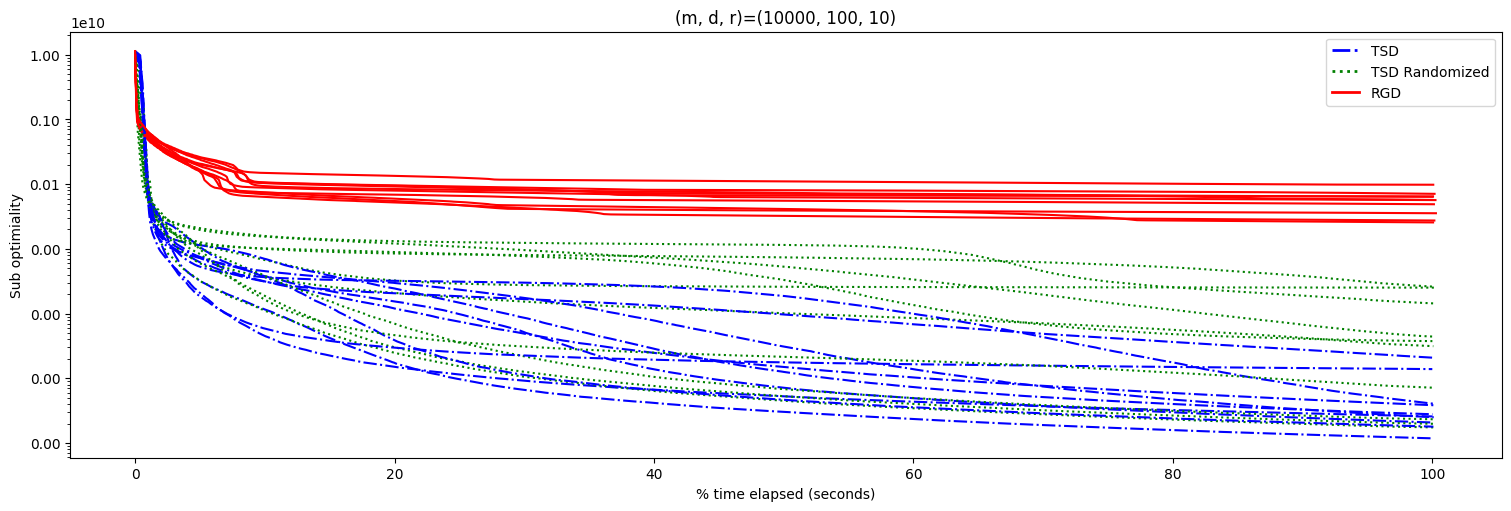

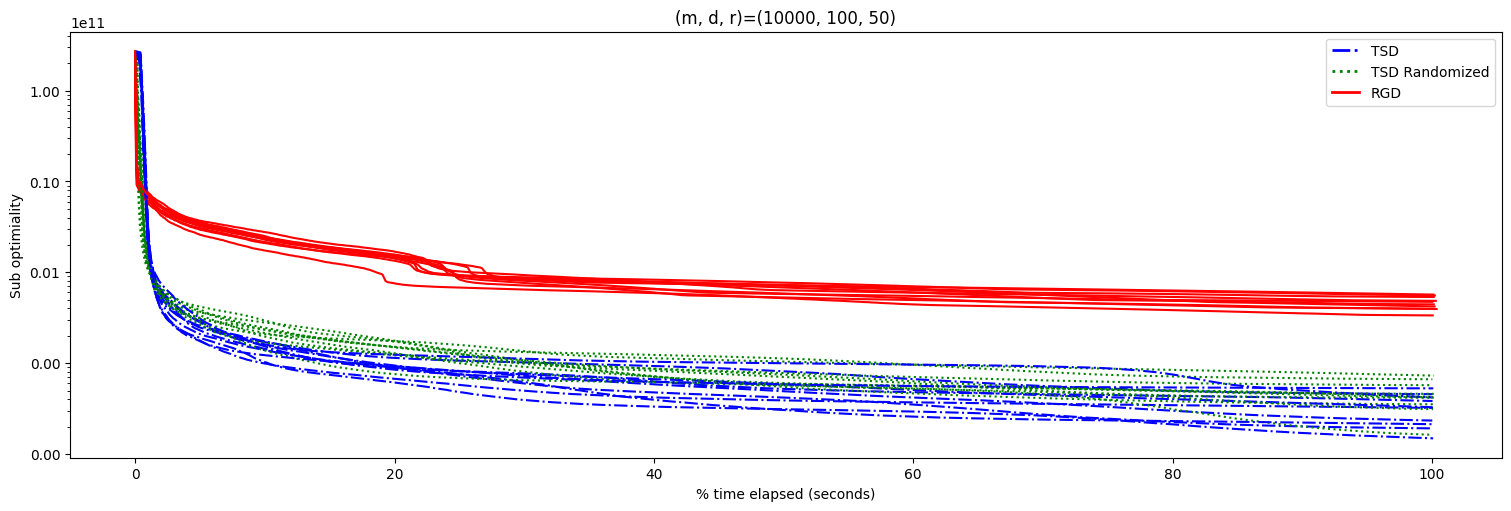

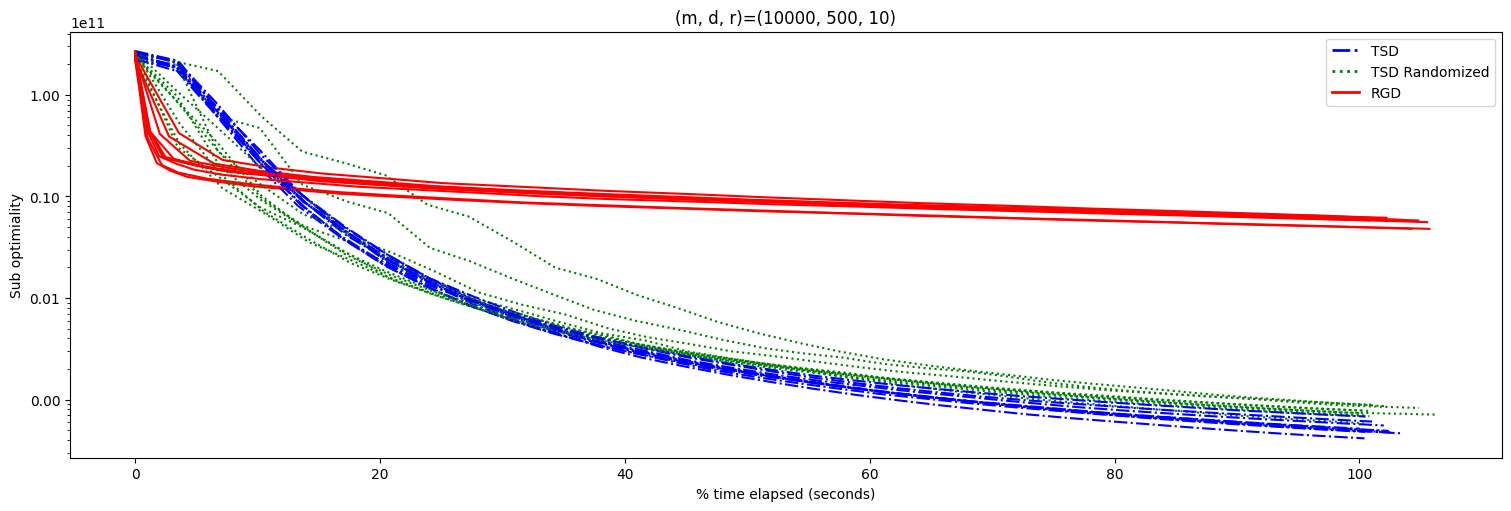

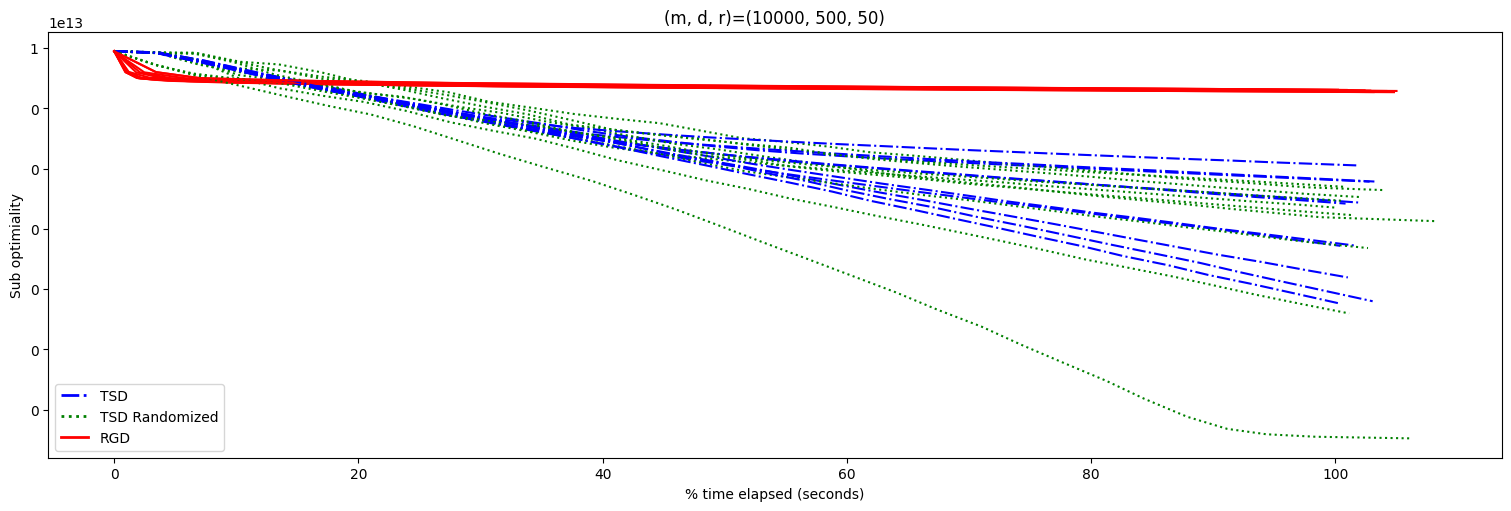

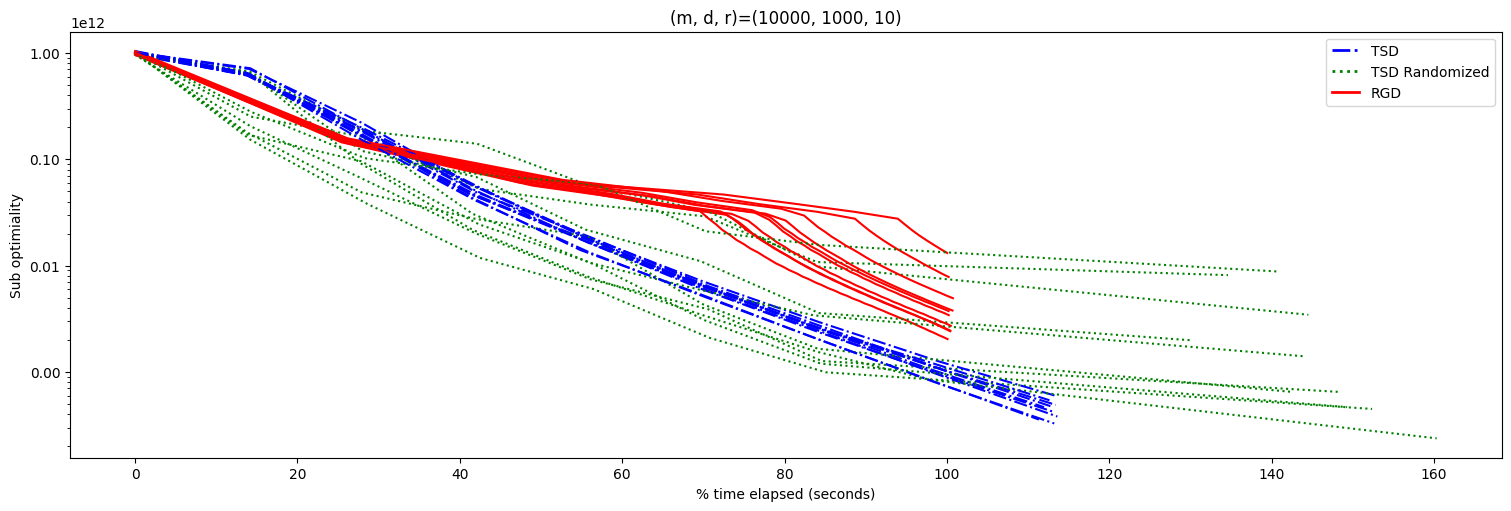

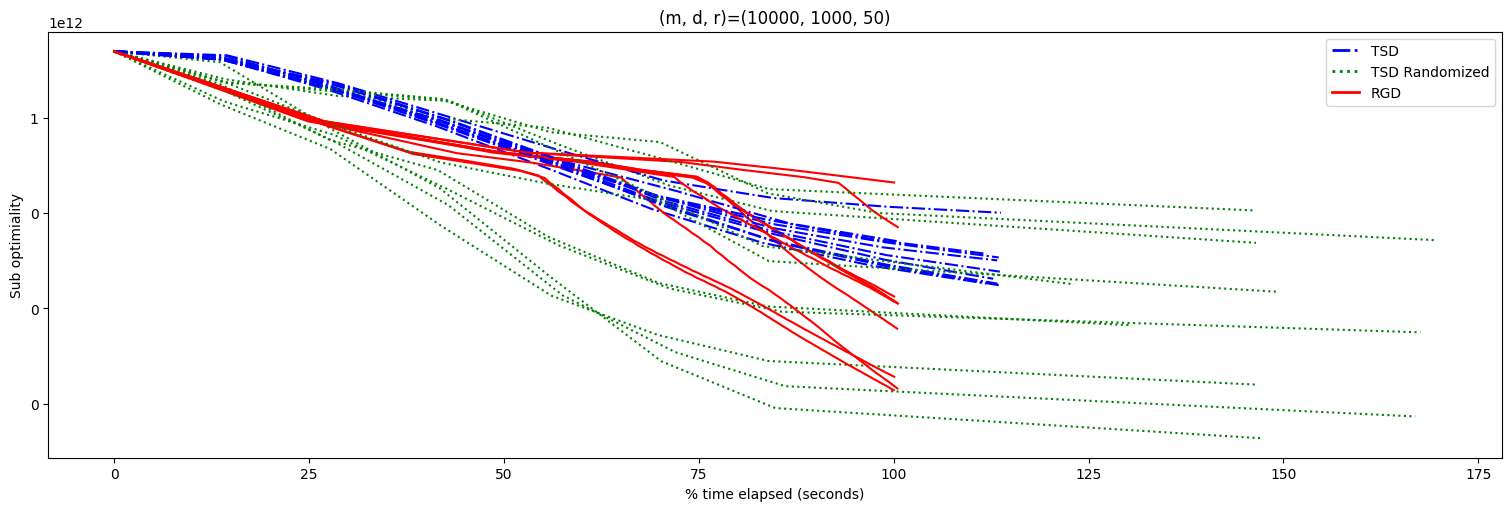

In [80]:
figs = [analyze_data(m,d,r) for m,d,r in test_data]

In [81]:
for fig, (m,d,r) in zip(figs, test_data):
    fig.savefig(f'{m}_{d}_{r}.pdf')